In [159]:
#Importing necessary packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib as plt
import seaborn as sns

In [160]:
#Reading in the data
df = pd.read_csv("C:/Users/Liam/Downloads/ITSC_3162/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Exploring data

In [146]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [147]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [148]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [161]:
# Ordering the amount of schooling someone got based on degree obtained
category_values = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
category_order = CategoricalDtype(category_values, ordered=True) 
df['parental level of education']= df['parental level of education'].astype(category_order) 

In [ ]:
#Averaging all scores to one "avg_score"


## Visualizations

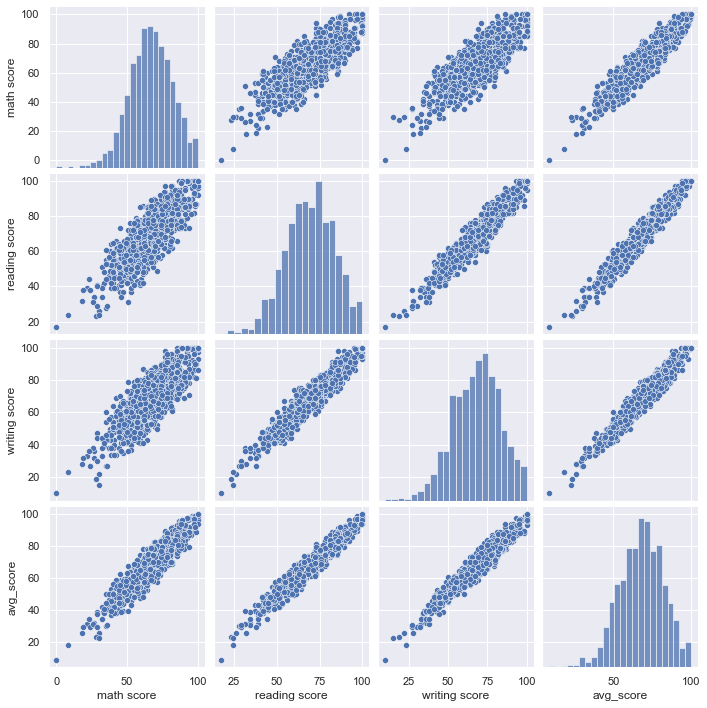

In [174]:
sns.set(rc = {"figure.figsize": (15, 5)})
sns.pairplot(data = df)
## We can see that the test scores all correlate with each other pretty well

In [163]:
#Averaging 3 test scores into one variable called avg_score
df = df.assign(avg_score = (df["math score"] + df["writing score"] + df["reading score"]) / 3)


[Text(0.5, 1.0, 'Average Test Score vs Parental Education')]

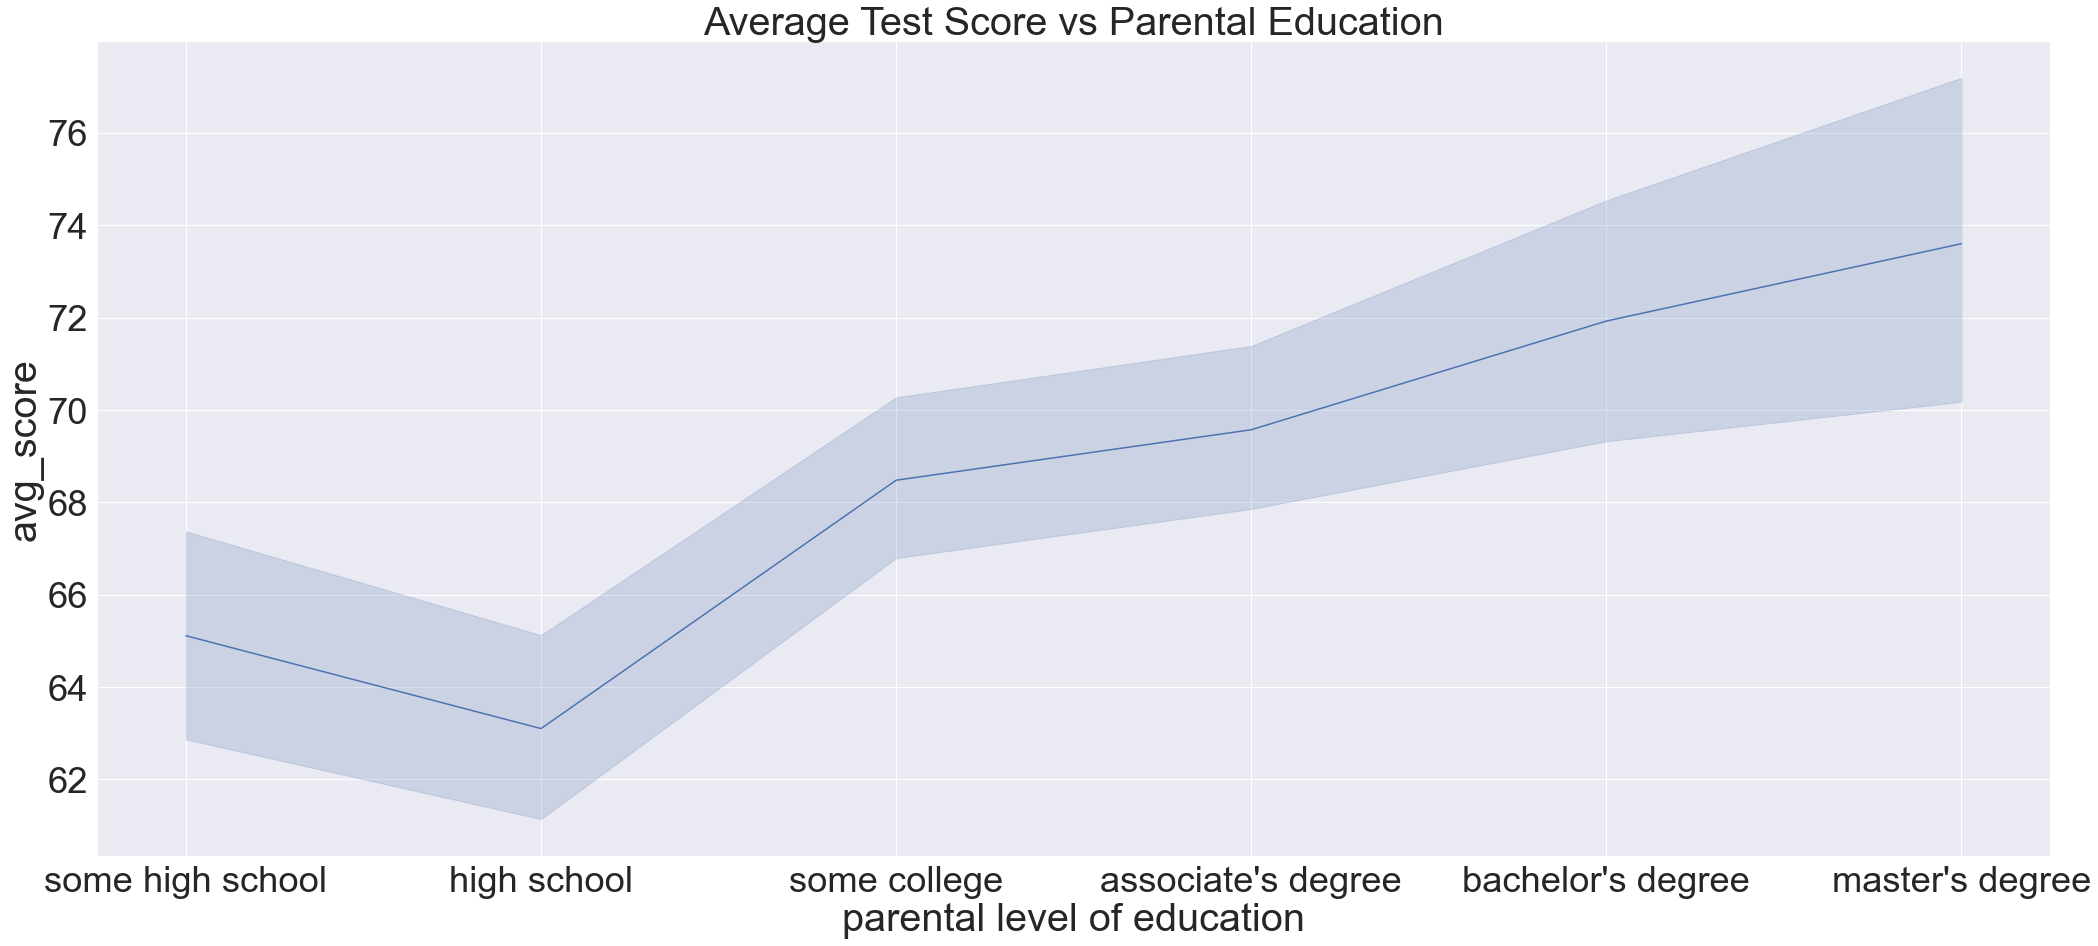

In [181]:
#Almost every step up in amount of education leads to higher test scores for one's kids.
sns.set(rc = {"figure.figsize": (35, 15)}) # Change size of graph
sns.set(font_scale = 3.3)
sns.lineplot(data = df, x = "parental level of education", y = "avg_score").set(
    title = "Average Test Score vs Parental Education")

[Text(0.5, 1.0, 'Average Test Score based on Test Preparation')]

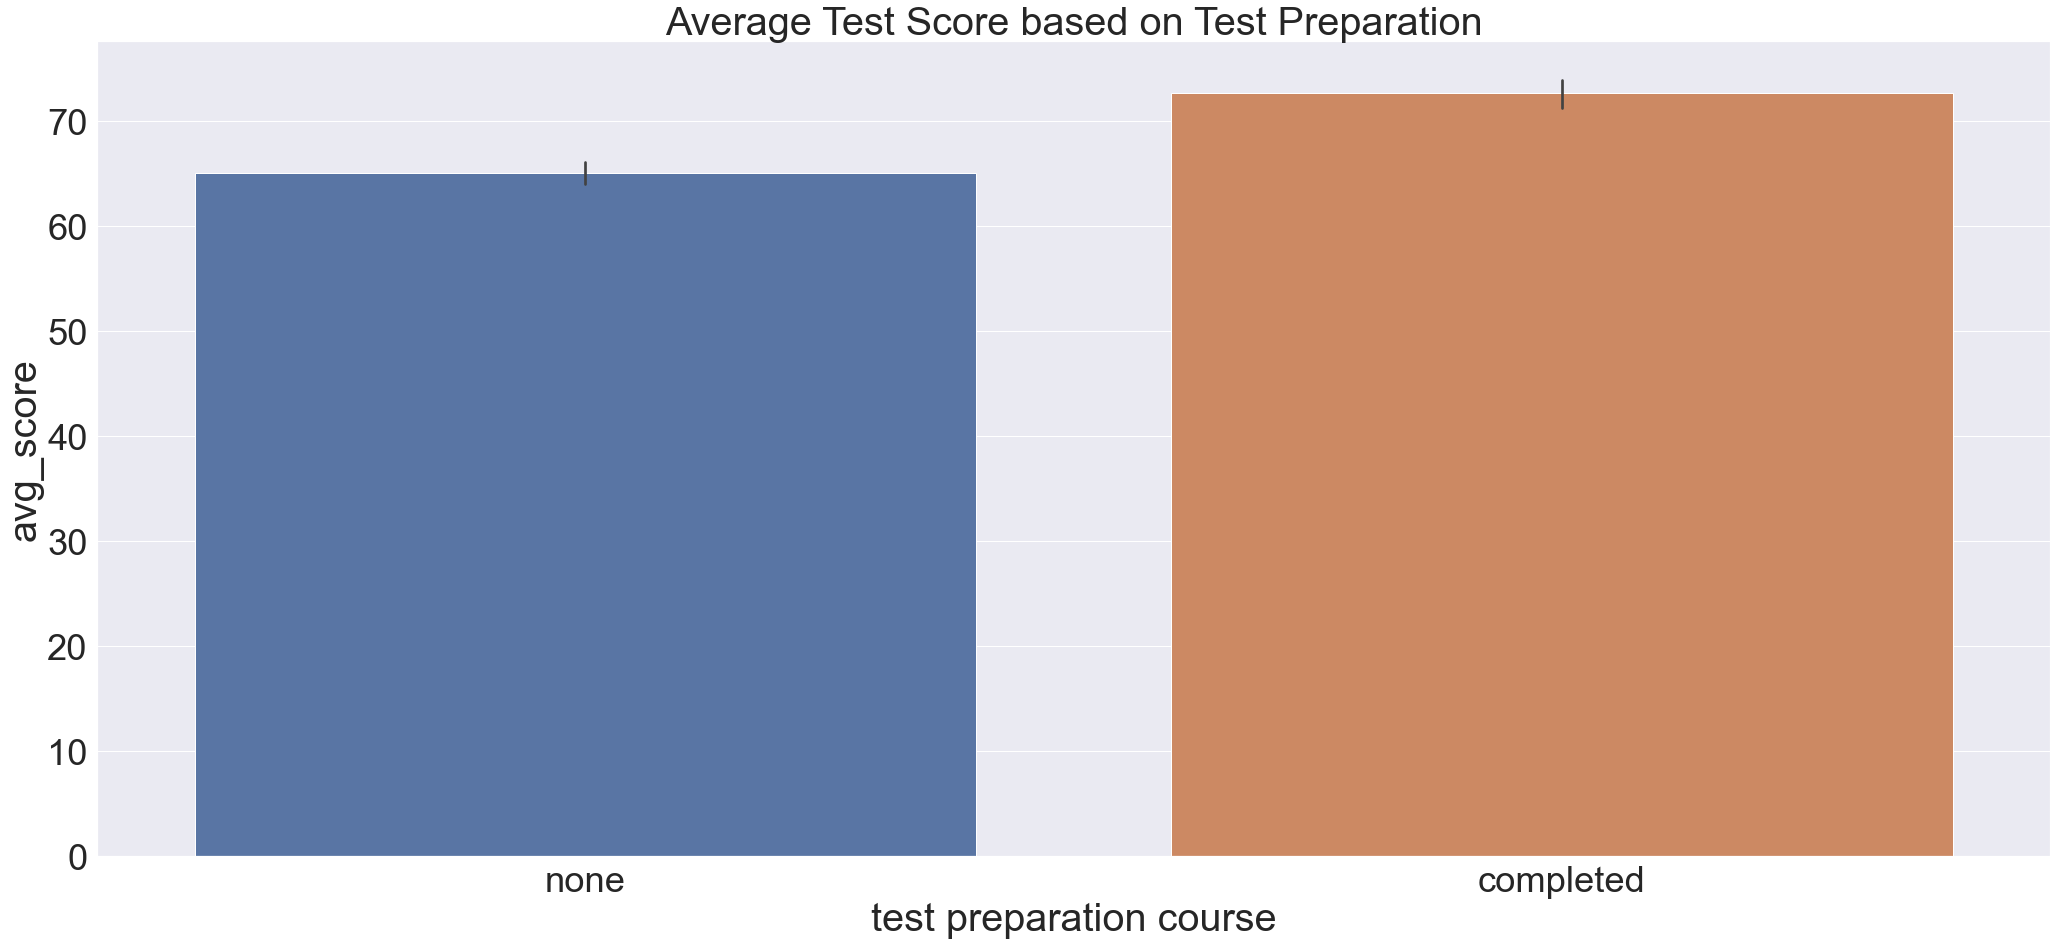

In [179]:
# We see that the relationship between test prep and test scores is similar to the relationship between 
sns.set(rc = {"figure.figsize": (35, 15)}) # Change size of graph
sns.set(font_scale = 3.3)
sns.barplot(x = "test preparation course", y = "avg_score", data = df).set(
    title = "Average Test Score based on Test Preparation")

In [ ]:
sns.set(rc = {"figure.figsize": (35, 15)}) # Change size of graph
sns.set(font_scale = 3.3)
sns.barplot(x = "parental level of education", y = "test preparation course", data = df).set(
    title = "Test Preperation vs Average Test Score")

[Text(0.5, 1.0, 'Test Preperation vs Average Test Score by Parental Level of Education')]

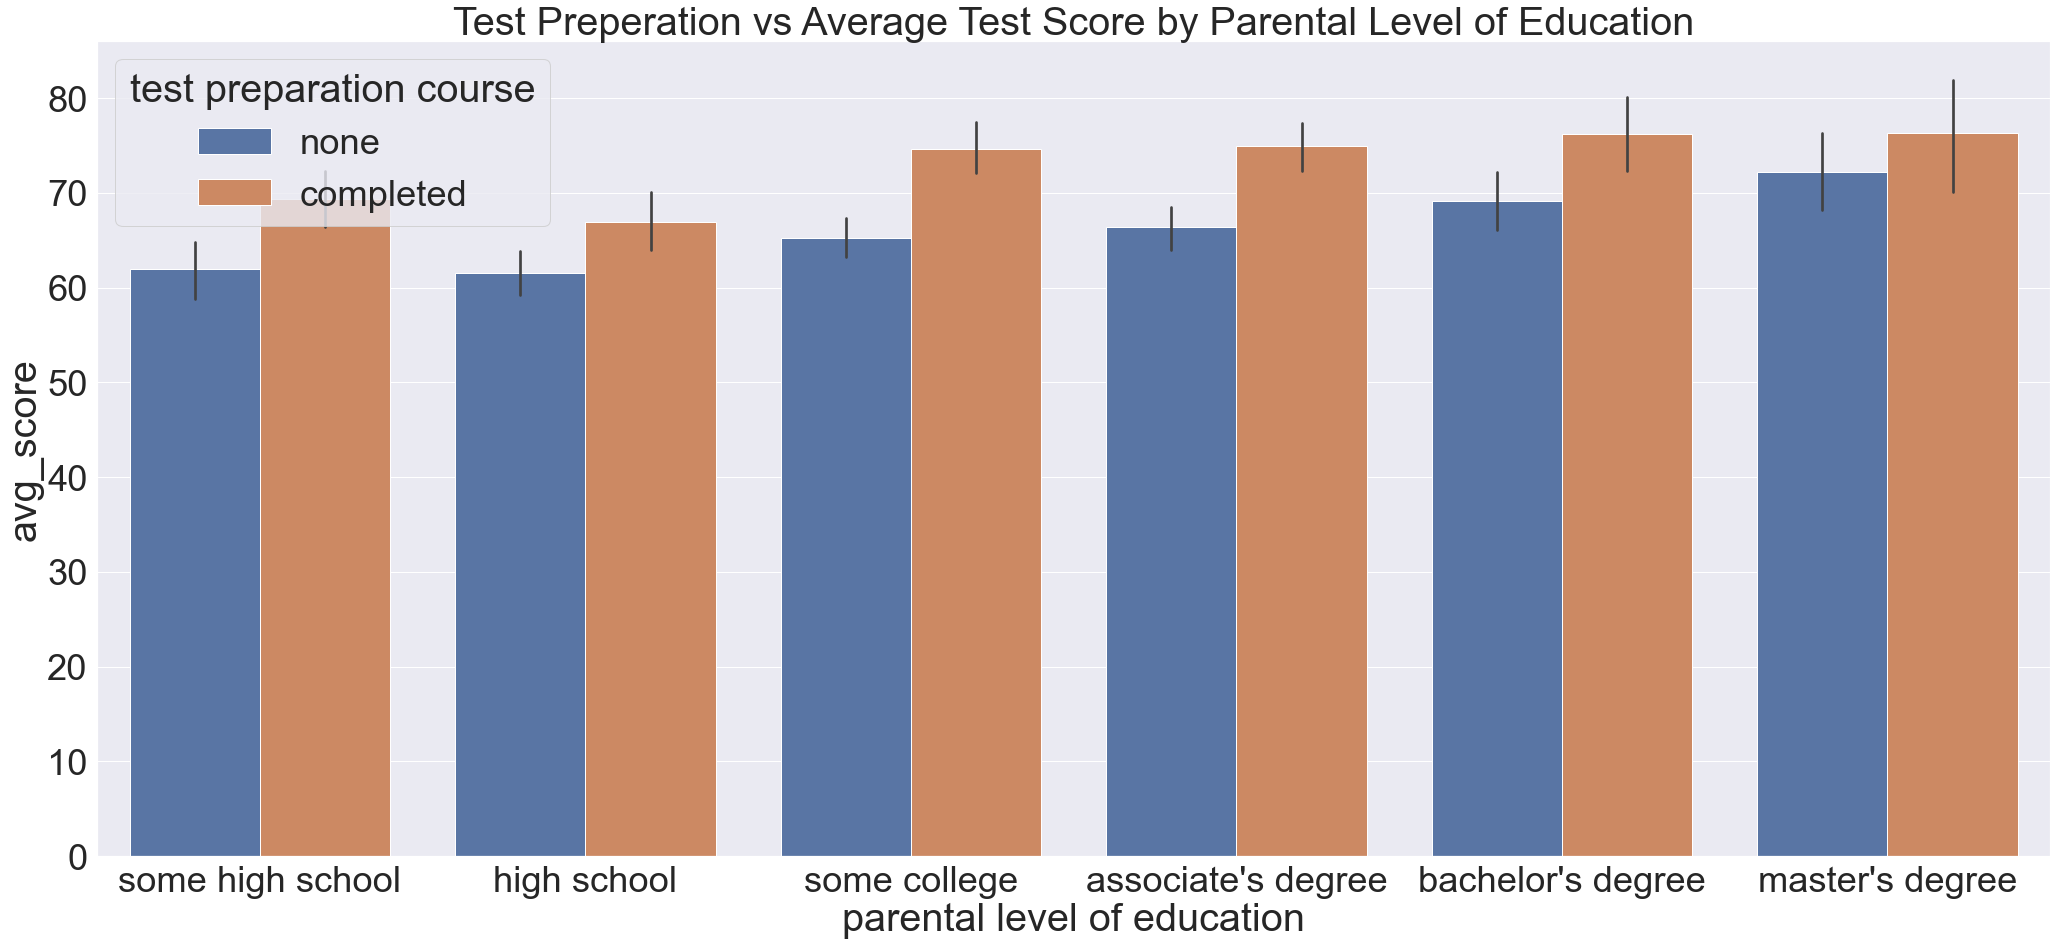

In [183]:
sns.set(rc = {"figure.figsize": (35, 15)}) # Change size of graph
sns.set(font_scale = 3.3)
sns.barplot(x = "parental level of education", y = "avg_score", data = df, hue = "test preparation course").set(
    title = "Test Preperation vs Average Test Score by Parental Level of Education")